# III. Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,company_age,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_librairies,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,-1,data engineer,na,"['python', 'sql', 'java']",[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.2,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,-1,data engineer,na,['sql'],['snowflake'],['ssis'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,-1,data engineer,na,"['python', 'sql']","['databricks', 'aws']",[],[],['spark'],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",106385,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,47,data engineer,na,['python'],[],['tableau'],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,-1,data engineer,na,['sql'],['oracle'],['tableau'],[],[],bachelor,5-10 years


#### Feature Engineering

Making a new dataframe with relevant features for the regression model

In [45]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,4.2,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,106385
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


Dropping some states and company industries that have below 15 data points and 10 respectively.

In [46]:
states_b15 = ["PA","UT","TN","FL","OH","SC","DE","CO","NC","OK"]

df_model = df_model[~df_model["job_state"].isin(states_b15)]
df_model['job_state'].value_counts()

Remote    130
GA        110
CA         86
TX         84
NJ         71
MN         49
DC         46
VA         44
WI         36
MD         34
IL         34
MS         24
NY         18
MA         17
OR         17
Name: job_state, dtype: int64

One Hot Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 0,  7, 11,  5,  4,  2, 12,  6,  9, 13,  8,  1, 14,  3, 10])

In [49]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [50]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 0, 1])

In [51]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([15, 24,  6,  8, 14, 16, 13,  9, 17,  0,  7, 10, 11, 22,  4, 23,  3,
       21, 18,  2, 20,  5, 19, 12,  1])

In [52]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([21, 16, 18, 24,  2, 12, 22, 15,  0,  5,  9, 14, 19, 17,  6,  1, 10,
       23,  3, 13, 20, 11,  8,  4,  7], dtype=int64)

In [53]:
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 2, 4, 3, 0])

In [54]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,0,0,2,1,15,21,70000
1,7,0,0,2,24,16,76500
2,11,0,1,1,6,18,121500
3,0,0,2,4,8,16,106385
4,5,0,0,3,24,24,117000


<Axes: >

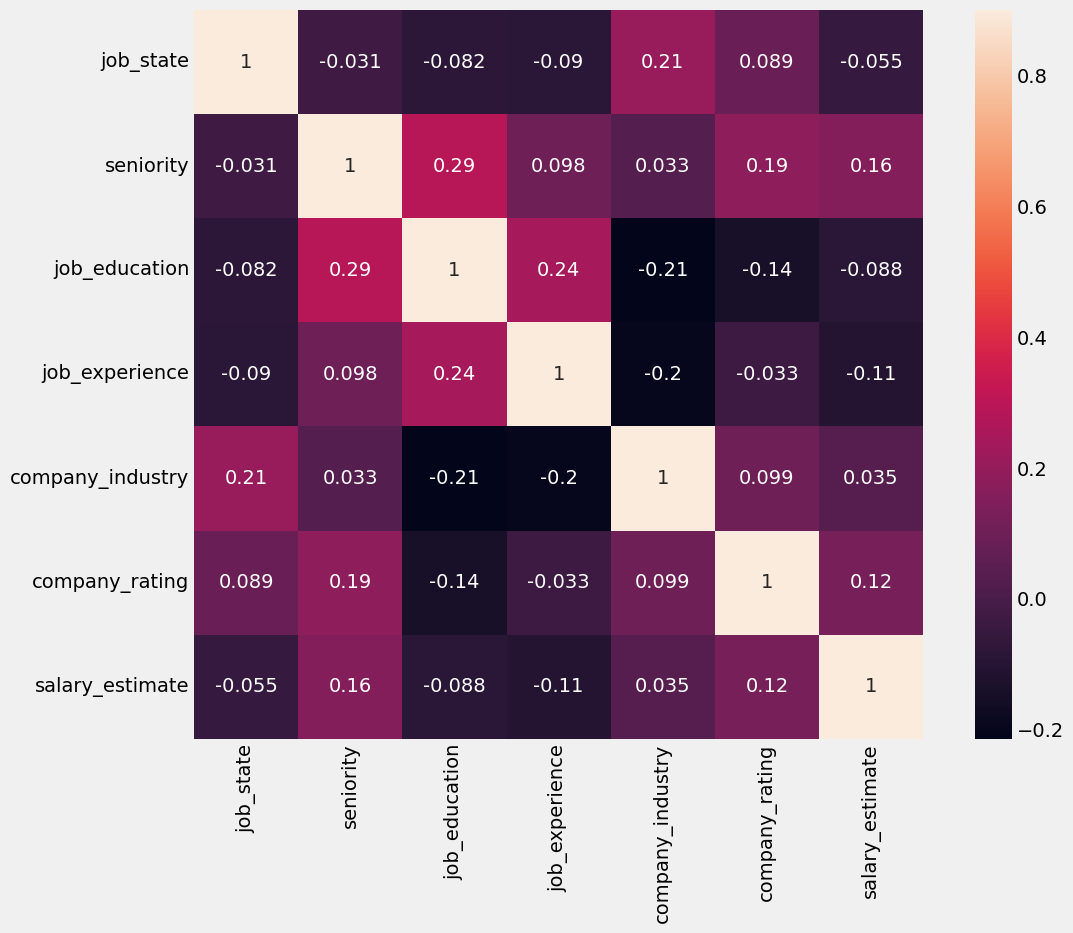

In [55]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the education and experience required.

### Random Forest Regressor Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [60]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Error : $7,251.48


In [61]:
errors = abs(y_pred - y_test)

In [62]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 97.77 %


Variable Importances

In [63]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: job_state            Importance: 0.28
Variable: company_industry     Importance: 0.23
Variable: company_rating       Importance: 0.23
Variable: job_experience       Importance: 0.17
Variable: seniority            Importance: 0.05
Variable: job_education        Importance: 0.05


Let's test our model on an example

In [64]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["GA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [65]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 2.,  1.,  0.,  1., 15., 19.]])

In [71]:
y_pred = regressor.predict(X_example)
y_pred[0]

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


139552.2

For a senior data engineer who's looking to work in Georgia (GA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $139,552 /year.

Exporting the model to a pickle file

In [67]:
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

Testing the model on after importing it from the pickle file

In [68]:
with open('../models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [69]:
y_pred = regressor_loaded.predict(X_example)
y_pred[0].round()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


139552.0